In [1]:
from sklearn.naive_bayes import GaussianNB
import os
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [9]:
# Set working directory
os.chdir('C:/Users/jesse/OneDrive/Documenten/Thesis/amazon_code/dataframes_done')

# Load df
df_senti = pd.read_json('senti_df_norm.json')
df_VADER = pd.read_json('VADER_df_norm.json')

# Select features VADER
selected_features = ['positive_score', 'neutral_score', 'polarity_shifters', 'intensity_modifiers', 'negations',
                     'emoticons']
df_VADER_selected = df_VADER[selected_features]

# Concatenate
sentiVADER_df = pd.concat([df_senti, df_VADER_selected], axis=1)

# Dataframe to Json 
sentiVADER_df.to_json('sentiVADER_df.json', orient='records')

sentiVADER_df.head()

,Label,Number_of_words,Number_of_sentences,Number_of_caps,Number_of_punctuation,Number_of_nouns,Number_of_verbs,Number_of_adjectives,Number_of_adverbs,Average_word_length,...,pos_875,neg_875,pos_1,neg_1,positive_score,neutral_score,polarity_shifters,intensity_modifiers,negations,emoticons
0,0,0.002822,0.010152,0.001144,0.005357,0.005908,0.009615,0.007663,0.009174,0.123009,...,0.000000,0.0,0,0.0,0.306497,0.693503,0.000000,0.012987,0.000000,0.0
1,0,0.020106,0.015228,0.002859,0.012500,0.026588,0.025000,0.038314,0.022936,0.200208,...,0.000000,0.0,0,0.0,0.193503,0.721751,0.055556,0.012987,0.040816,0.0
2,0,0.014109,0.030457,0.003431,0.017857,0.013294,0.023077,0.030651,0.022936,0.092044,...,0.090909,0.0,0,0.0,0.233051,0.692090,0.055556,0.038961,0.061224,0.0
3,0,0.010582,0.020305,0.004002,0.008929,0.013294,0.019231,0.011494,0.018349,0.104161,...,0.000000,0.0,0,0.0,0.139831,0.860169,0.000000,0.038961,0.020408,0.0
4,0,0.019400,0.015228,0.002859,0.010714,0.023634,0.019231,0.022989,0.022936,0.102568,...,0.000000,0.0,0,0.0,0.163842,0.836158,0.000000,0.012987,0.000000,0.0


In [10]:
sentiVADER_df.columns

Index(['Label', 'Number_of_words', 'Number_of_sentences', 'Number_of_caps',
       'Number_of_punctuation', 'Number_of_nouns', 'Number_of_verbs',
       'Number_of_adjectives', 'Number_of_adverbs', 'Average_word_length',
       'Average_sentence_length', 'Redundancy_score', 'Readability_score',
       'Lexical_diversity', 'Sentiment_score', 'Review_intensity',
       'Review_ambiguity', 'Number_of_positive words:',
       'Number_of_negative words:', 'Number_of_objective words:', 'pos_125',
       'neg_125', 'pos_25', 'neg_25', 'pos_375', 'neg_375', 'pos_5', 'neg_5',
       'pos_625', 'neg_625', 'pos_75', 'neg_75', 'pos_875', 'neg_875', 'pos_1',
       'neg_1', 'positive_score', 'neutral_score', 'polarity_shifters',
       'intensity_modifiers', 'negations', 'emoticons'],
      dtype='object')

Number of Selected Features: 41
SVM Accuracy: 59.11904761904761
SVM Precision: 59.756097560975604
SVM Recall: 54.05275779376498
SVM F1 Score: 56.76152102744899


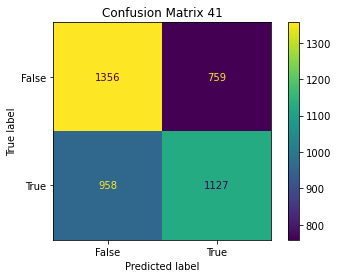


Number of Selected Features: 40
SVM Accuracy: 59.11904761904761
SVM Precision: 59.756097560975604
SVM Recall: 54.05275779376498
SVM F1 Score: 56.76152102744899


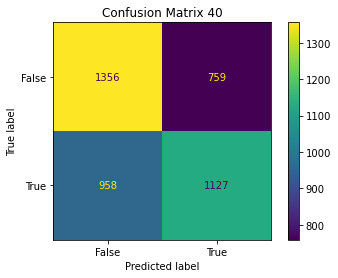


Number of Selected Features: 39
SVM Accuracy: 59.0952380952381
SVM Precision: 59.73474801061008
SVM Recall: 54.00479616306954
SVM F1 Score: 56.72544080604535


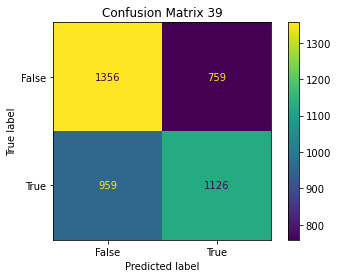


Number of Selected Features: 38
SVM Accuracy: 59.11904761904761
SVM Precision: 59.72515856236787
SVM Recall: 54.196642685851316
SVM F1 Score: 56.82675383454865


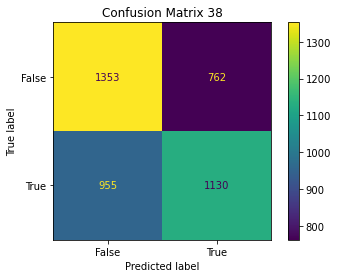


Number of Selected Features: 37
SVM Accuracy: 59.404761904761905
SVM Precision: 60.08492569002123
SVM Recall: 54.29256594724221
SVM F1 Score: 57.04207608969515


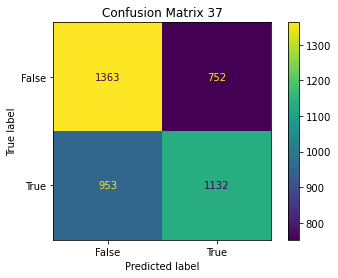


Number of Selected Features: 36
SVM Accuracy: 59.404761904761905
SVM Precision: 60.07423117709438
SVM Recall: 54.34052757793765
SVM F1 Score: 57.06371191135735


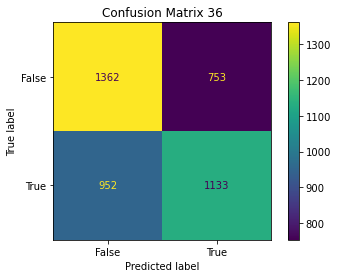


Number of Selected Features: 35
SVM Accuracy: 59.38095238095238
SVM Precision: 60.01056524035921
SVM Recall: 54.48441247002398
SVM F1 Score: 57.11412770236299


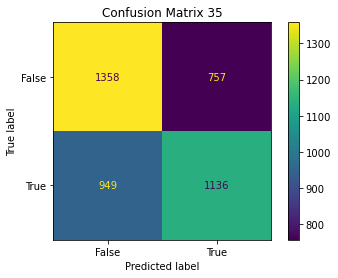


Number of Selected Features: 34
SVM Accuracy: 59.38095238095238
SVM Precision: 60.14997321906802
SVM Recall: 53.860911270983216
SVM F1 Score: 56.83198380566802


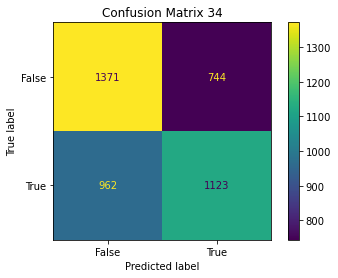


Number of Selected Features: 33
SVM Accuracy: 59.54761904761905
SVM Precision: 60.33190578158458
SVM Recall: 54.05275779376498
SVM F1 Score: 57.01998482165445


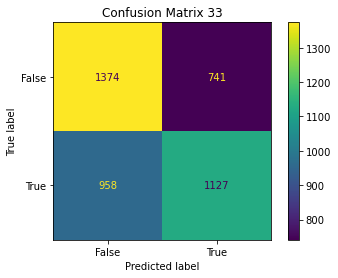


Number of Selected Features: 32
SVM Accuracy: 59.333333333333336
SVM Precision: 60.11808910359635
SVM Recall: 53.71702637889688
SVM F1 Score: 56.73758865248227


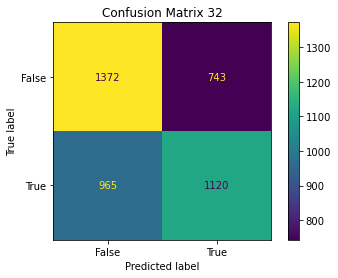


Number of Selected Features: 31
SVM Accuracy: 58.523809523809526
SVM Precision: 59.050131926121374
SVM Recall: 53.669064748201436
SVM F1 Score: 56.23115577889447


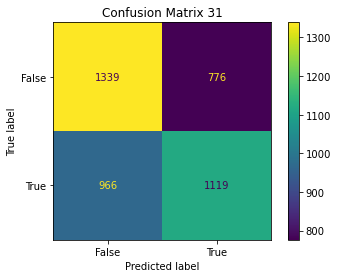


Number of Selected Features: 30
SVM Accuracy: 58.785714285714285
SVM Precision: 59.56756756756757
SVM Recall: 52.8537170263789
SVM F1 Score: 56.01016518424397


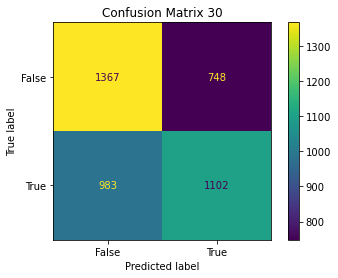


Number of Selected Features: 29
SVM Accuracy: 58.57142857142858
SVM Precision: 59.25925925925925
SVM Recall: 52.94964028776978
SVM F1 Score: 55.92705167173252


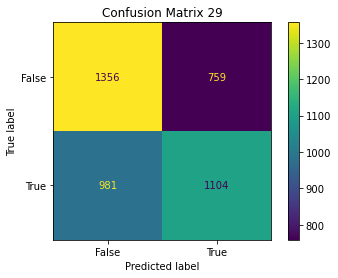


Number of Selected Features: 28
SVM Accuracy: 58.666666666666664
SVM Precision: 59.2769803296119
SVM Recall: 53.47721822541966
SVM F1 Score: 56.22793746848209


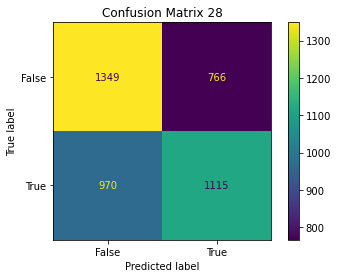


Number of Selected Features: 27
SVM Accuracy: 58.5
SVM Precision: 59.057203389830505
SVM Recall: 53.47721822541966
SVM F1 Score: 56.128869871633526


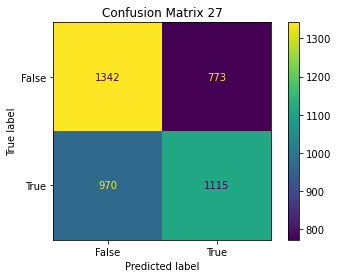


Number of Selected Features: 26
SVM Accuracy: 58.738095238095234
SVM Precision: 59.3716719914803
SVM Recall: 53.47721822541966
SVM F1 Score: 56.270502144839774


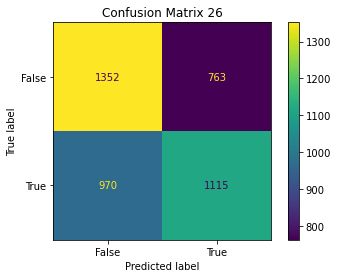


Number of Selected Features: 25
SVM Accuracy: 58.64285714285714
SVM Precision: 59.3048128342246
SVM Recall: 53.189448441247
SVM F1 Score: 56.08091024020227


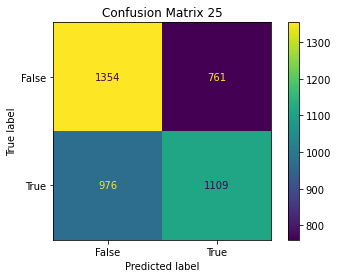


Number of Selected Features: 24
SVM Accuracy: 58.5952380952381
SVM Precision: 59.261241970021416
SVM Recall: 53.093525179856115
SVM F1 Score: 56.00809511763217


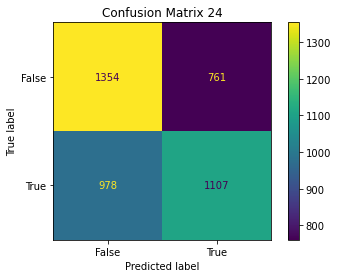


Number of Selected Features: 23
SVM Accuracy: 58.14285714285714
SVM Precision: 58.77616747181964
SVM Recall: 52.51798561151079
SVM F1 Score: 55.4711246200608


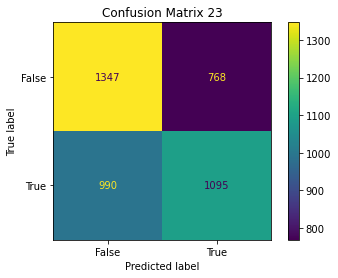


Number of Selected Features: 22
SVM Accuracy: 58.19047619047619
SVM Precision: 58.810926620246384
SVM Recall: 52.66187050359712
SVM F1 Score: 55.56680161943319


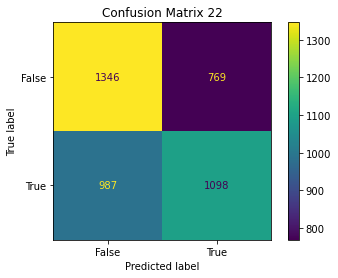


Number of Selected Features: 21
SVM Accuracy: 57.738095238095234
SVM Precision: 57.98146240988672
SVM Recall: 54.00479616306954
SVM F1 Score: 55.92252296995282


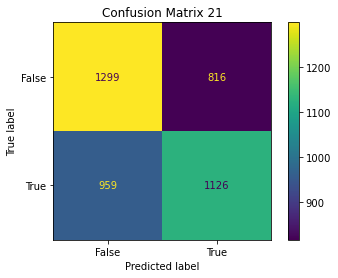


Number of Selected Features: 20
SVM Accuracy: 57.64285714285714
SVM Precision: 57.960457856399586
SVM Recall: 53.429256594724215
SVM F1 Score: 55.6026952832543


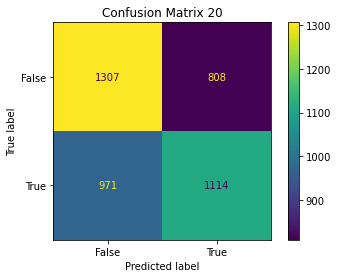


Number of Selected Features: 19
SVM Accuracy: 57.57142857142858
SVM Precision: 57.84567581563957
SVM Recall: 53.57314148681055
SVM F1 Score: 55.62749003984063


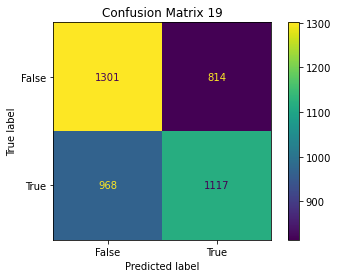


Number of Selected Features: 18
SVM Accuracy: 57.5952380952381
SVM Precision: 57.924921793534935
SVM Recall: 53.28537170263788
SVM F1 Score: 55.508368723457416


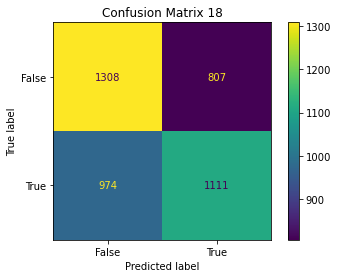


Number of Selected Features: 17
SVM Accuracy: 57.64285714285714
SVM Precision: 58.02728226652676
SVM Recall: 53.04556354916067
SVM F1 Score: 55.42470558757204


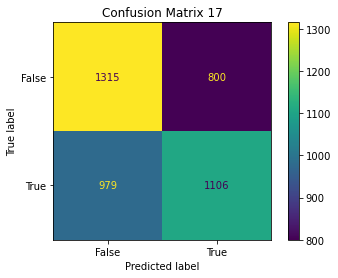


Number of Selected Features: 16
SVM Accuracy: 57.57142857142858
SVM Precision: 57.927786499215074
SVM Recall: 53.093525179856115
SVM F1 Score: 55.4054054054054


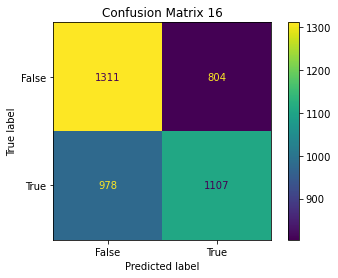


Number of Selected Features: 15
SVM Accuracy: 57.214285714285715
SVM Precision: 57.44570837642192
SVM Recall: 53.28537170263788
SVM F1 Score: 55.287384921622284


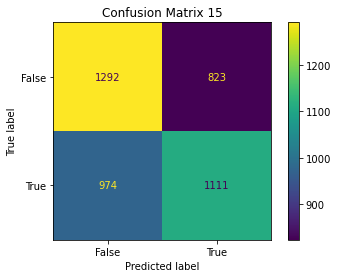


Number of Selected Features: 14
SVM Accuracy: 57.14285714285714
SVM Precision: 57.35673722250903
SVM Recall: 53.28537170263788
SVM F1 Score: 55.24614619592243


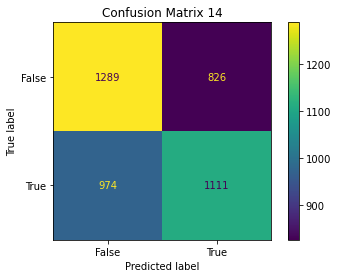


Number of Selected Features: 13
SVM Accuracy: 57.214285714285715
SVM Precision: 57.484407484407484
SVM Recall: 53.04556354916067
SVM F1 Score: 55.17585432776254


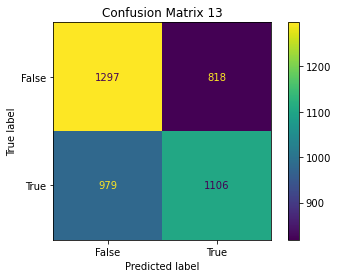


Number of Selected Features: 12
SVM Accuracy: 57.166666666666664
SVM Precision: 57.44016649323621
SVM Recall: 52.94964028776978
SVM F1 Score: 55.10356875467932


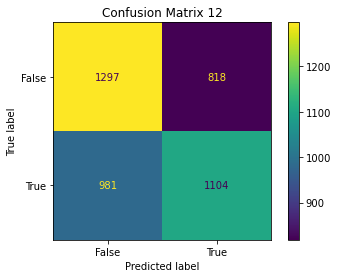


Number of Selected Features: 11
SVM Accuracy: 56.76190476190476
SVM Precision: 57.06036745406824
SVM Recall: 52.134292565947234
SVM F1 Score: 54.48621553884712


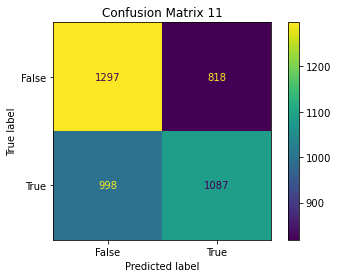


Number of Selected Features: 10
SVM Accuracy: 56.69047619047619
SVM Precision: 57.24400871459695
SVM Recall: 50.407673860911274
SVM F1 Score: 53.60877327212445


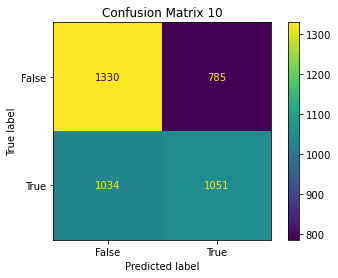


Number of Selected Features: 9
SVM Accuracy: 56.42857142857143
SVM Precision: 56.955810147299516
SVM Recall: 50.07194244604316
SVM F1 Score: 53.29249617151608


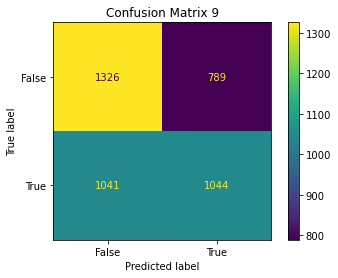


Number of Selected Features: 8
SVM Accuracy: 56.57142857142857
SVM Precision: 57.019903173749334
SVM Recall: 50.83932853717026
SVM F1 Score: 53.75253549695741


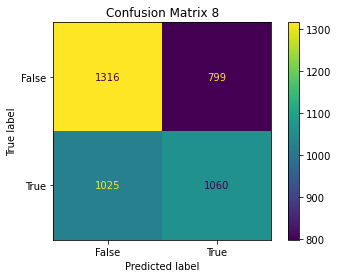


Number of Selected Features: 7
SVM Accuracy: 54.38095238095239
SVM Precision: 54.181098466105894
SVM Recall: 52.51798561151079
SVM F1 Score: 53.336580613736


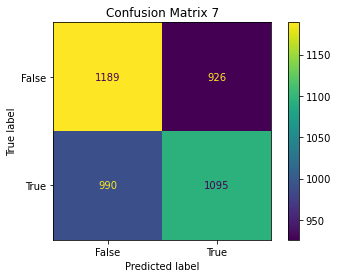


Number of Selected Features: 6
SVM Accuracy: 54.333333333333336
SVM Precision: 54.210791729702464
SVM Recall: 51.55875299760192
SVM F1 Score: 52.85152409046214


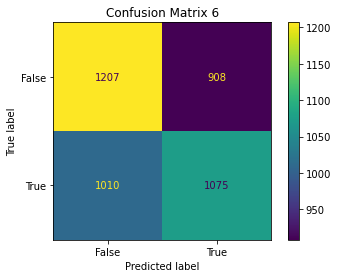


Number of Selected Features: 5
SVM Accuracy: 54.333333333333336
SVM Precision: 54.210791729702464
SVM Recall: 51.55875299760192
SVM F1 Score: 52.85152409046214


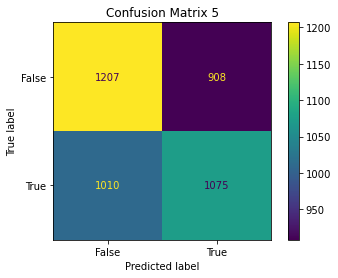


Number of Selected Features: 4
SVM Accuracy: 54.595238095238095
SVM Precision: 54.559426229508205
SVM Recall: 51.07913669064749
SVM F1 Score: 52.761951944513264


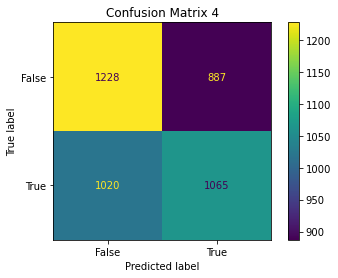


Number of Selected Features: 3
SVM Accuracy: 54.19047619047619
SVM Precision: 53.98317664522514
SVM Recall: 52.326139088729015
SVM F1 Score: 53.141743789576225


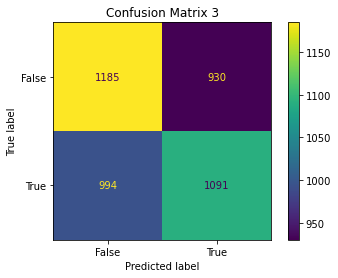


Number of Selected Features: 2
SVM Accuracy: 52.642857142857146
SVM Precision: 51.84757505773672
SVM Recall: 64.60431654676259
SVM F1 Score: 57.52722613709162


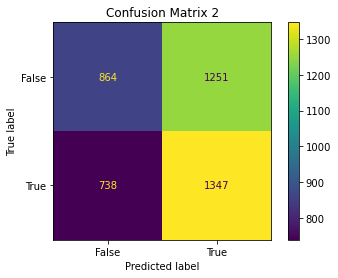


Number of Selected Features: 1
SVM Accuracy: 51.595238095238095
SVM Precision: 51.44284128745837
SVM Recall: 44.460431654676256
SVM F1 Score: 47.697453048623615


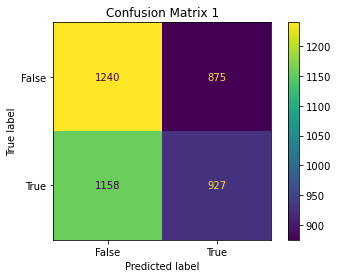

In [11]:
# Set working directory
os.chdir('C:/Users/jesse/OneDrive/Documenten/Thesis/amazon_code/dataframes_done')

# Read JSON file
df = pd.read_json('sentiVADER_df.json', orient='records')

# Assign X and y
X = df.drop(['Label'], axis=1)
y = df['Label']

# Straining and test set
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

results = []

for n_features_to_select in n_features_range:
    regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
    rfe = RFE(regressor, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    selected_features = X.columns[rfe.support_].tolist()

    # SVM
    svm = SVC(kernel='linear')
    svm.fit(X_train_transformed, y_train)
    predictions = svm.predict(X_test_transformed)

    svm_accuracy = accuracy_score(y_test, predictions) * 100
    svm_precision = precision_score(y_test, predictions) * 100
    svm_recall = recall_score(y_test, predictions) * 100
    svm_f1_score = f1_score(y_test, predictions) * 100

    print(f"Number of Selected Features: {n_features_to_select}")
    print(f"SVM Accuracy: {svm_accuracy}")
    print(f"SVM Precision: {svm_precision}")
    print(f"SVM Recall: {svm_recall}")
    print(f"SVM F1 Score: {svm_f1_score}")

    result = {
        "n_features": n_features_to_select,
        "accuracy": svm_accuracy,
        "precision": svm_precision,
        "recall": svm_recall,
        "f1_score": svm_f1_score
    }

    results.append(result)

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title("Confusion Matrix " + str(n_features_to_select))  
    plt.show()
    print()

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results in an Excel file
results_df.to_excel('results_sentiVADER_ML_SVC.xlsx', index=False)


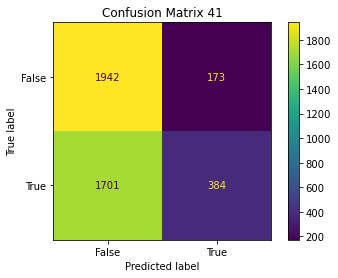

Number of Selected Features: 41
Accuracy: 55.38095238095239
Precision: 68.9407540394973
Recall: 18.41726618705036
F1 Score: 29.06888720666162



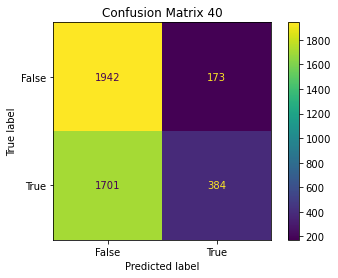

Number of Selected Features: 40
Accuracy: 55.38095238095239
Precision: 68.9407540394973
Recall: 18.41726618705036
F1 Score: 29.06888720666162



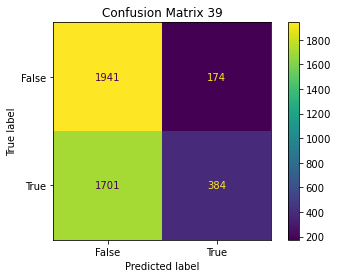

Number of Selected Features: 39
Accuracy: 55.35714285714286
Precision: 68.81720430107528
Recall: 18.41726618705036
F1 Score: 29.05788876276958



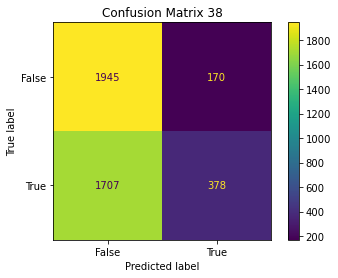

Number of Selected Features: 38
Accuracy: 55.30952380952381
Precision: 68.97810218978103
Recall: 18.1294964028777
F1 Score: 28.71249525256362



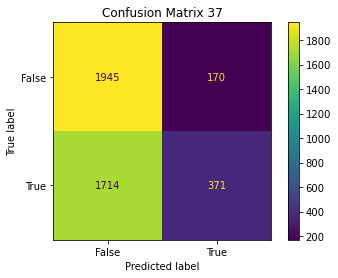

Number of Selected Features: 37
Accuracy: 55.14285714285714
Precision: 68.57670979667283
Recall: 17.793764988009592
F1 Score: 28.25590251332826



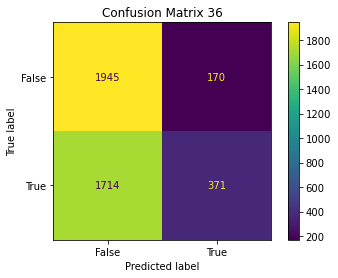

Number of Selected Features: 36
Accuracy: 55.14285714285714
Precision: 68.57670979667283
Recall: 17.793764988009592
F1 Score: 28.25590251332826



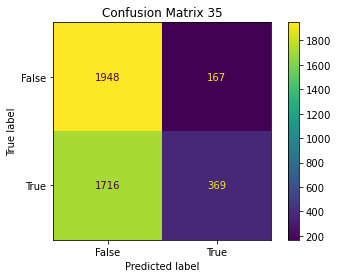

Number of Selected Features: 35
Accuracy: 55.166666666666664
Precision: 68.84328358208955
Recall: 17.697841726618705
F1 Score: 28.157191911484166



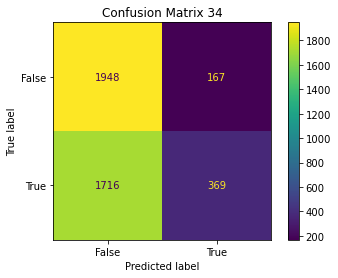

Number of Selected Features: 34
Accuracy: 55.166666666666664
Precision: 68.84328358208955
Recall: 17.697841726618705
F1 Score: 28.157191911484166



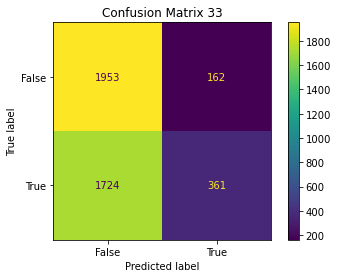

Number of Selected Features: 33
Accuracy: 55.095238095238095
Precision: 69.02485659655831
Recall: 17.314148681055155
F1 Score: 27.6840490797546



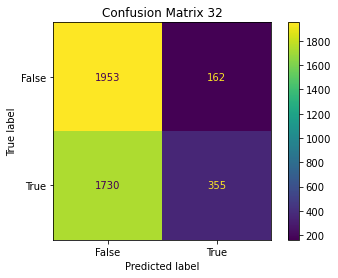

Number of Selected Features: 32
Accuracy: 54.95238095238095
Precision: 68.66537717601547
Recall: 17.026378896882495
F1 Score: 27.286702536510376



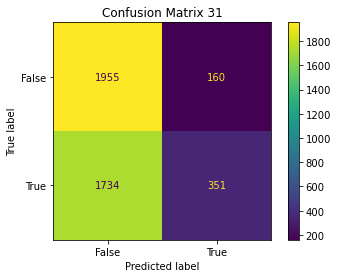

Number of Selected Features: 31
Accuracy: 54.9047619047619
Precision: 68.68884540117418
Recall: 16.834532374100718
F1 Score: 27.041602465331284



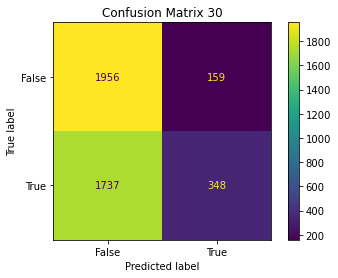

Number of Selected Features: 30
Accuracy: 54.85714285714286
Precision: 68.63905325443787
Recall: 16.69064748201439
F1 Score: 26.851851851851855



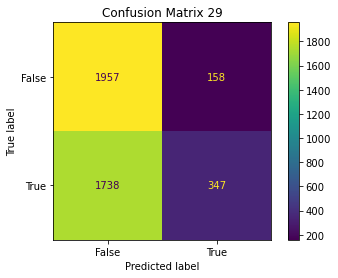

Number of Selected Features: 29
Accuracy: 54.85714285714286
Precision: 68.71287128712872
Recall: 16.642685851318944
F1 Score: 26.795366795366792



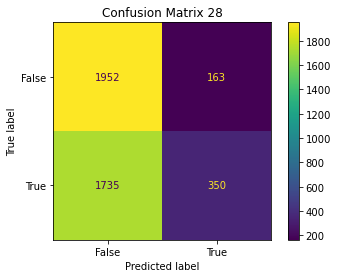

Number of Selected Features: 28
Accuracy: 54.80952380952381
Precision: 68.2261208576998
Recall: 16.786570743405278
F1 Score: 26.943802925327176



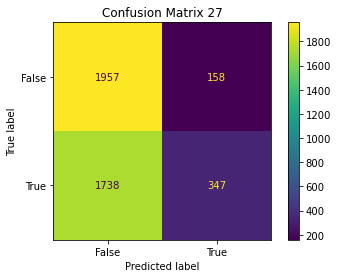

Number of Selected Features: 27
Accuracy: 54.85714285714286
Precision: 68.71287128712872
Recall: 16.642685851318944
F1 Score: 26.795366795366792



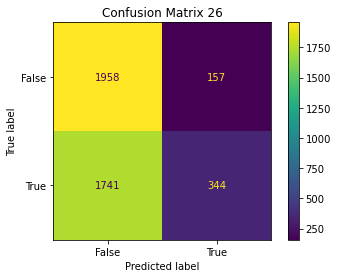

Number of Selected Features: 26
Accuracy: 54.80952380952381
Precision: 68.6626746506986
Recall: 16.498800959232614
F1 Score: 26.604795050270692



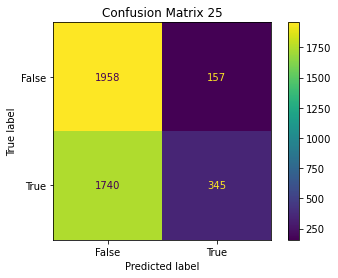

Number of Selected Features: 25
Accuracy: 54.833333333333336
Precision: 68.72509960159363
Recall: 16.546762589928058
F1 Score: 26.671820641669886



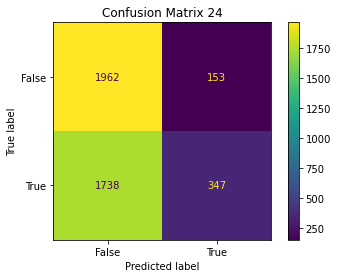

Number of Selected Features: 24
Accuracy: 54.97619047619048
Precision: 69.39999999999999
Recall: 16.642685851318944
F1 Score: 26.84719535783366



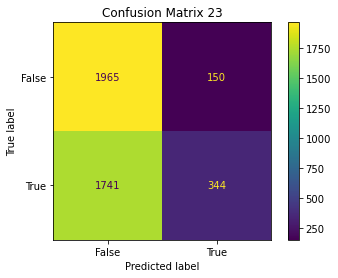

Number of Selected Features: 23
Accuracy: 54.97619047619048
Precision: 69.63562753036437
Recall: 16.498800959232614
F1 Score: 26.677006591702213



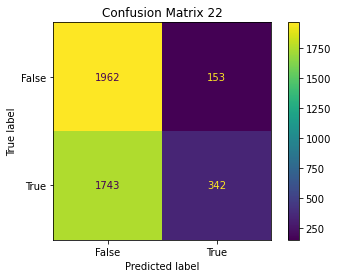

Number of Selected Features: 22
Accuracy: 54.85714285714286
Precision: 69.0909090909091
Recall: 16.402877697841728
F1 Score: 26.51162790697675



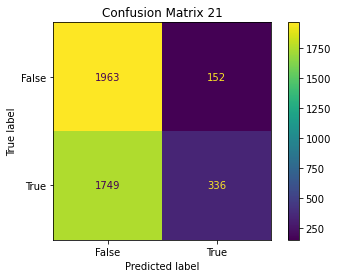

Number of Selected Features: 21
Accuracy: 54.73809523809524
Precision: 68.85245901639344
Recall: 16.115107913669064
F1 Score: 26.11737271667314



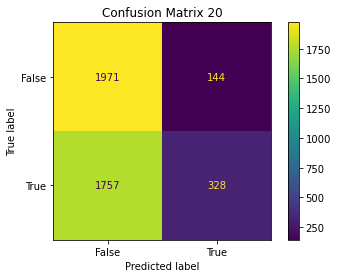

Number of Selected Features: 20
Accuracy: 54.73809523809524
Precision: 69.49152542372882
Recall: 15.731414868105514
F1 Score: 25.65506452874462



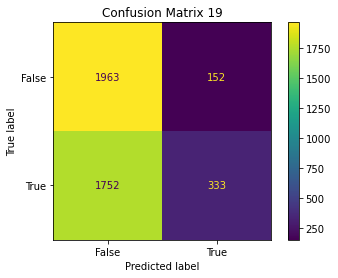

Number of Selected Features: 19
Accuracy: 54.666666666666664
Precision: 68.65979381443299
Recall: 15.971223021582734
F1 Score: 25.91439688715953



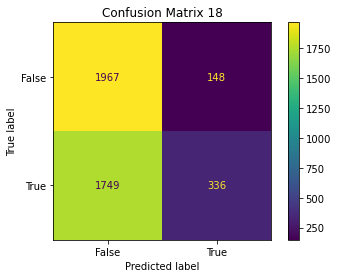

Number of Selected Features: 18
Accuracy: 54.833333333333336
Precision: 69.42148760330579
Recall: 16.115107913669064
F1 Score: 26.158038147138964



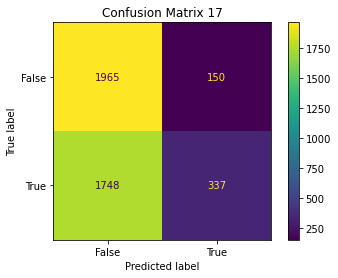

Number of Selected Features: 17
Accuracy: 54.80952380952381
Precision: 69.19917864476386
Recall: 16.163069544364507
F1 Score: 26.20528771384137



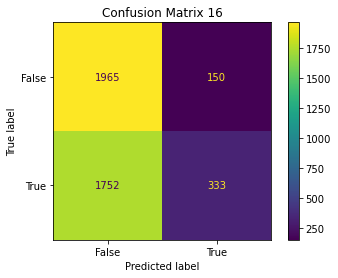

Number of Selected Features: 16
Accuracy: 54.714285714285715
Precision: 68.94409937888199
Recall: 15.971223021582734
F1 Score: 25.934579439252335



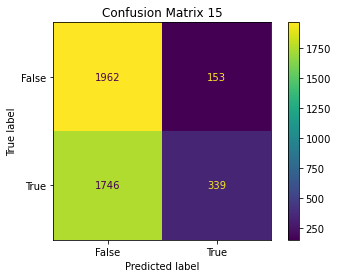

Number of Selected Features: 15
Accuracy: 54.785714285714285
Precision: 68.90243902439023
Recall: 16.258992805755394
F1 Score: 26.30966239813737



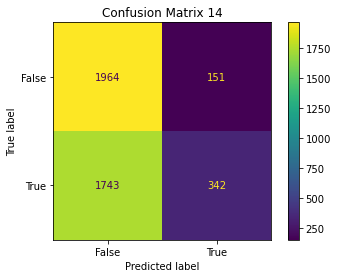

Number of Selected Features: 14
Accuracy: 54.9047619047619
Precision: 69.3711967545639
Recall: 16.402877697841728
F1 Score: 26.5321955003879



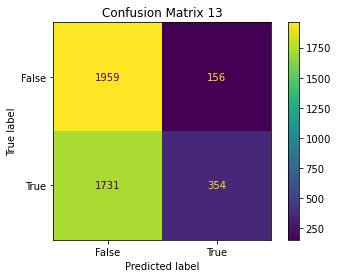

Number of Selected Features: 13
Accuracy: 55.07142857142857
Precision: 69.41176470588235
Recall: 16.97841726618705
F1 Score: 27.283236994219656



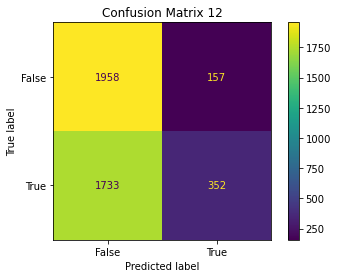

Number of Selected Features: 12
Accuracy: 55.00000000000001
Precision: 69.15520628683693
Recall: 16.882494004796165
F1 Score: 27.139552814186587



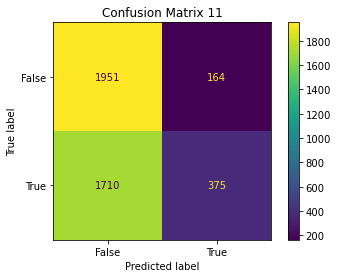

Number of Selected Features: 11
Accuracy: 55.38095238095239
Precision: 69.57328385899815
Recall: 17.985611510791365
F1 Score: 28.58231707317073



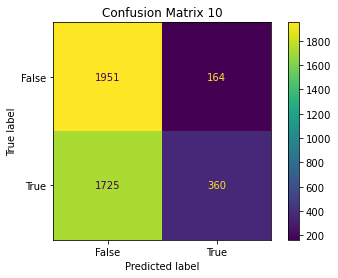

Number of Selected Features: 10
Accuracy: 55.02380952380952
Precision: 68.70229007633588
Recall: 17.26618705035971
F1 Score: 27.596780375622842



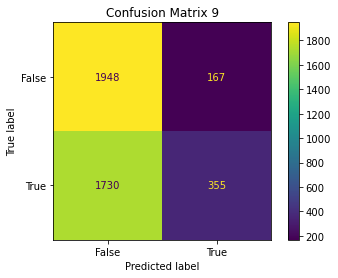

Number of Selected Features: 9
Accuracy: 54.833333333333336
Precision: 68.00766283524904
Recall: 17.026378896882495
F1 Score: 27.234369006520904



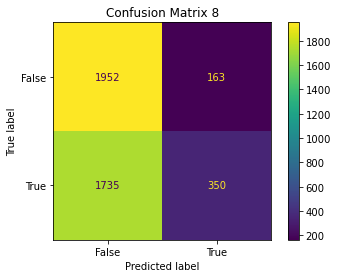

Number of Selected Features: 8
Accuracy: 54.80952380952381
Precision: 68.2261208576998
Recall: 16.786570743405278
F1 Score: 26.943802925327176



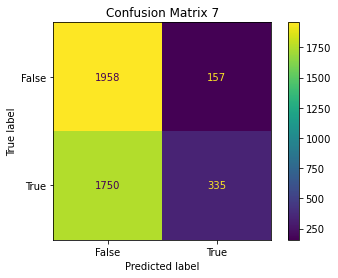

Number of Selected Features: 7
Accuracy: 54.595238095238095
Precision: 68.08943089430895
Recall: 16.06714628297362
F1 Score: 25.99922390376406



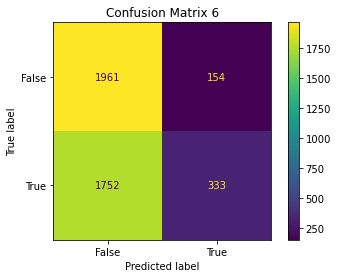

Number of Selected Features: 6
Accuracy: 54.61904761904762
Precision: 68.37782340862422
Recall: 15.971223021582734
F1 Score: 25.894245723172627



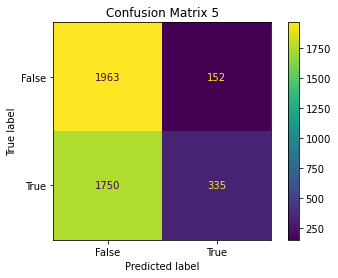

Number of Selected Features: 5
Accuracy: 54.714285714285715
Precision: 68.78850102669405
Recall: 16.06714628297362
F1 Score: 26.049766718507



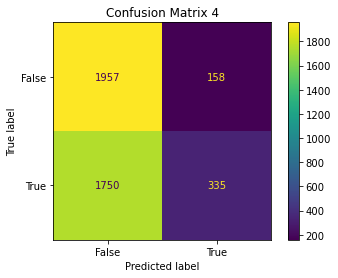

Number of Selected Features: 4
Accuracy: 54.57142857142857
Precision: 67.95131845841786
Recall: 16.06714628297362
F1 Score: 25.989138867339022



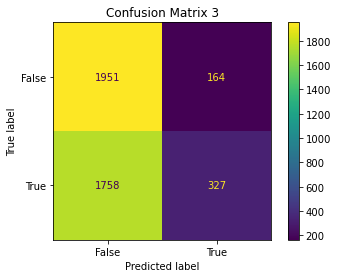

Number of Selected Features: 3
Accuracy: 54.23809523809524
Precision: 66.59877800407332
Recall: 15.683453237410072
F1 Score: 25.388198757763973



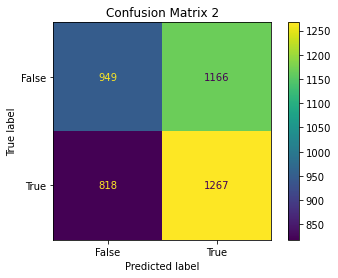

Number of Selected Features: 2
Accuracy: 52.761904761904766
Precision: 52.075626798191536
Recall: 60.76738609112709
F1 Score: 56.08676405489156



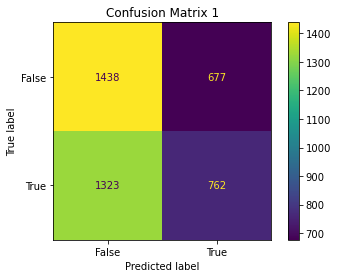

Number of Selected Features: 1
Accuracy: 52.38095238095239
Precision: 52.95343988881167
Recall: 36.54676258992806
F1 Score: 43.24631101021566



In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Set working directory
os.chdir('C:/Users/jesse/OneDrive/Documenten/Thesis/amazon_code/dataframes_done')

# Read JSON file
df = pd.read_json('sentiVADER_df.json', orient='records')

# Train and test set
X = df.drop(['Label'], axis=1)
y = df['Label']
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

results = []

for n_features_to_select in n_features_range:
    regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
    rfe = RFE(regressor, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    selected_features = X.columns[rfe.support_].tolist()

    # GNB
    gnb1 = GaussianNB()
    gnb1.fit(X_train_transformed, y_train)
    predictions = gnb1.predict(X_test_transformed)

    # Evaluate
    gnb_accuracy = accuracy_score(y_test, predictions) * 100
    gnb_precision = precision_score(y_test, predictions) * 100
    gnb_recall = recall_score(y_test, predictions) * 100
    gnb_f1_score = f1_score(y_test, predictions) * 100

    result = {
        "n_features": n_features_to_select,
        "accuracy": gnb_accuracy,
        "precision": gnb_precision,
        "recall": gnb_recall,
        "f1_score": gnb_f1_score
    }

    results.append(result)

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title("Confusion Matrix " + str(n_features_to_select))  
    plt.show()

    print(f"Number of Selected Features: {n_features_to_select}")
    print("Accuracy:", gnb_accuracy)
    print("Precision:", gnb_precision)
    print("Recall:", gnb_recall)
    print("F1 Score:", gnb_f1_score)
    print()

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results in an Excel file
results_df.to_excel('results_sentiVADER_ML_NB.xlsx', index=False) 